In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
sklearn.set_config(transform_output="pandas")


# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Lasso

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import GridSearchCV, KFold


In [2]:
train = pd.read_csv('/home/saule/House-Prices-Project/Data/train.csv')
test = pd.read_csv('/home/saule/House-Prices-Project/Data/test.csv')

In [3]:
test_id = pd.read_csv('/home/saule/House-Prices-Project/Data/test.csv', usecols=['Id'])

**EDA и работа с выбросами**

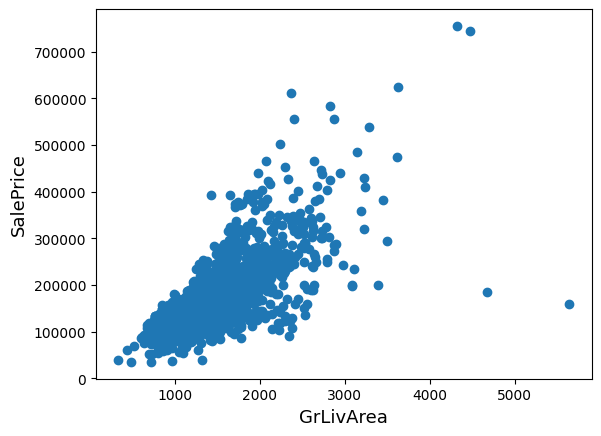

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [5]:
# Удаляем выброcы
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

<BarContainer object of 1457 artists>

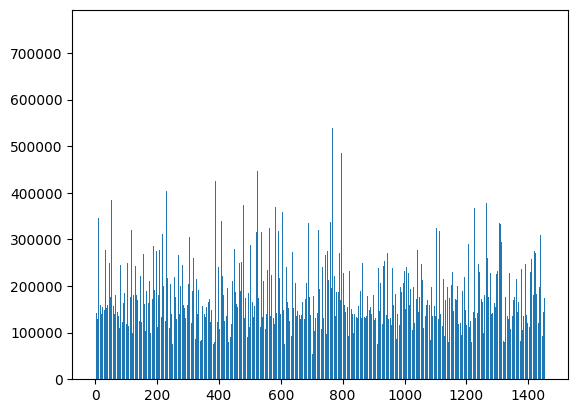

In [6]:
plt.bar(train.index, train['SalePrice'])

In [7]:
# Удаляем выброcы
train = train[train['SalePrice'] <= 350000]

(array([1.228e+03, 0.000e+00, 1.430e+02, 0.000e+00, 0.000e+00, 2.800e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

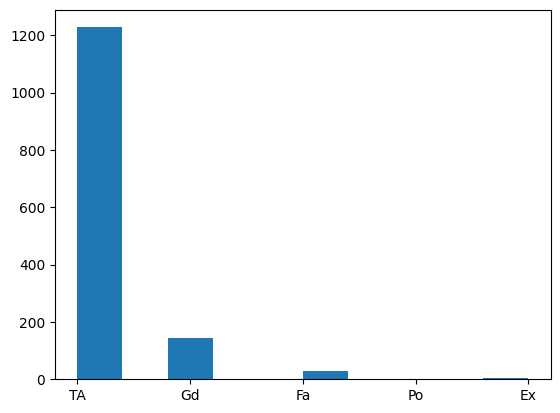

In [8]:
plt.hist(train['ExterCond'])

(array([1.372e+03, 0.000e+00, 1.700e+01, 0.000e+00, 7.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

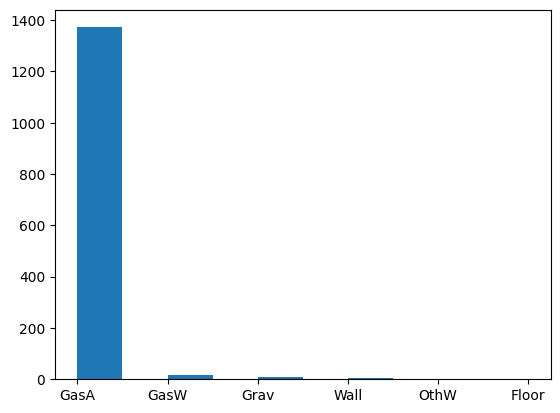

In [9]:
plt.hist(train['Heating'])  # дропнуть

(array([1397.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

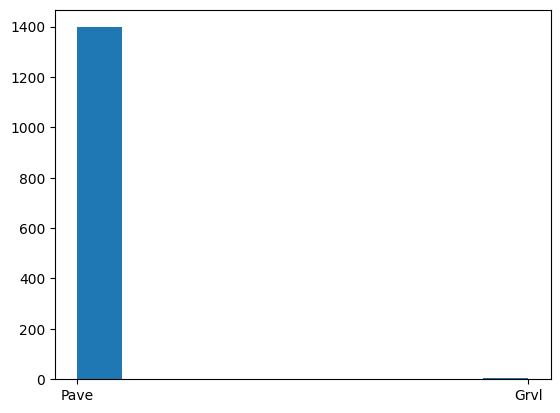

In [10]:
plt.hist(train['Street'])  # дропнуть

(array([1.402e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

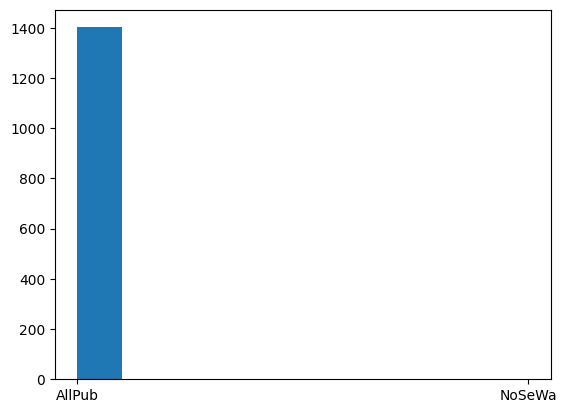

In [11]:
plt.hist(train['Utilities'])  # дропнуть

(array([1.305e+03, 3.000e+01, 0.000e+00, 1.400e+01, 0.000e+00, 3.400e+01,
        1.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

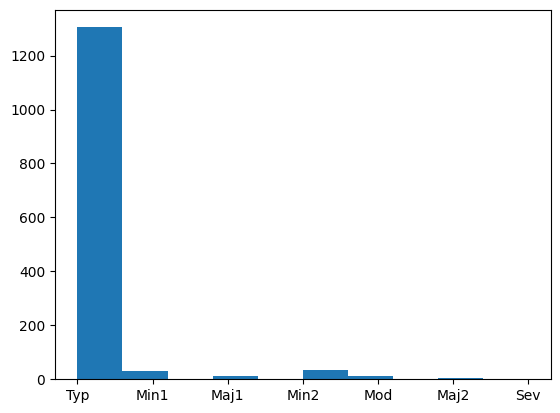

In [26]:
plt.hist(train['Functional']) 

<Axes: xlabel='Exterior2nd', ylabel='SalePrice'>

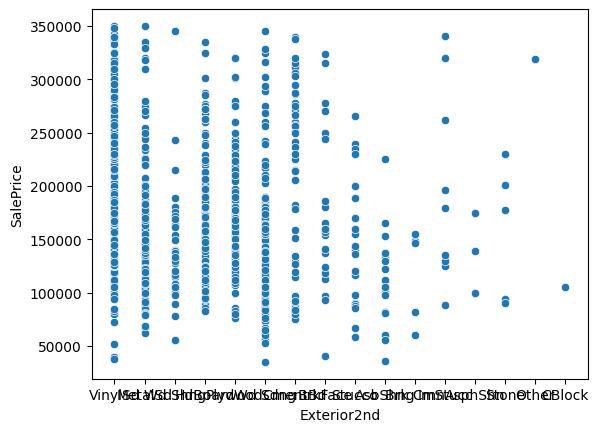

In [24]:
sns.scatterplot(data=train, x='Exterior2nd', y='SalePrice') # дропнуть PoolArea

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

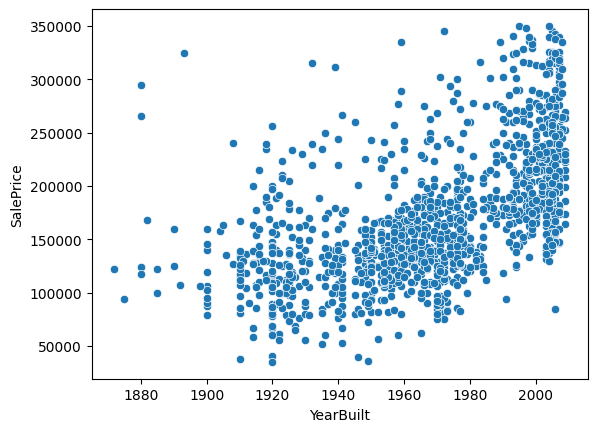

In [14]:
sns.scatterplot(data=train, x='YearBuilt', y='SalePrice') 

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

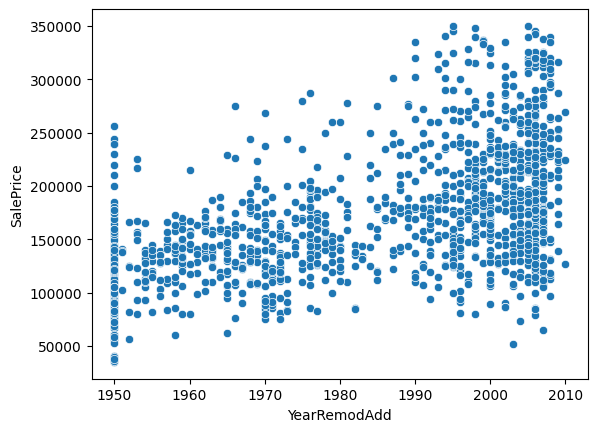

In [15]:
sns.scatterplot(data=train, x='YearRemodAdd', y='SalePrice')

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

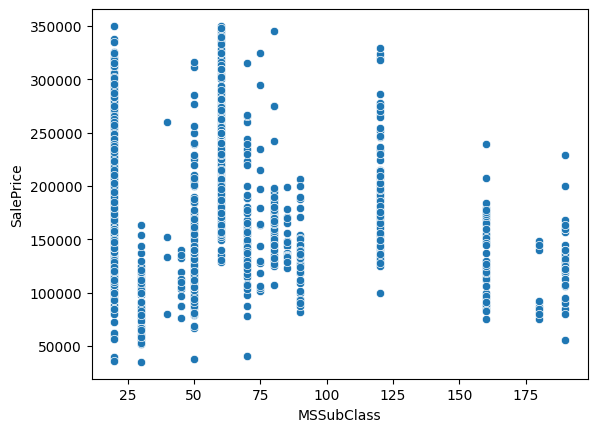

In [16]:
sns.scatterplot(data=train, x='MSSubClass', y='SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

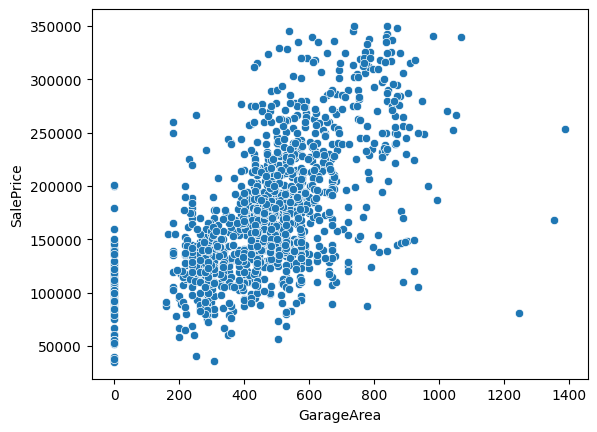

In [21]:
sns.scatterplot(data=train, x='GarageArea', y='SalePrice')

<Axes: xlabel='Condition2', ylabel='SalePrice'>

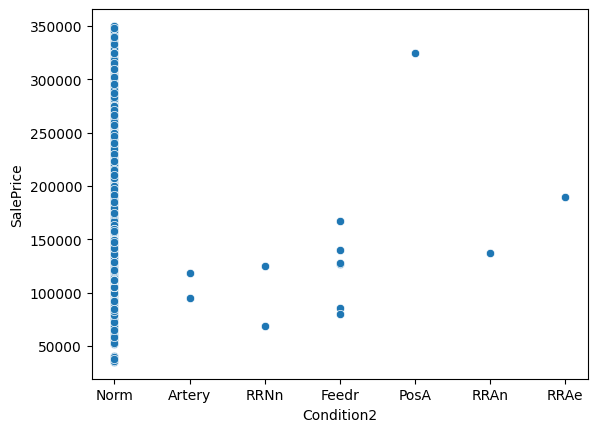

In [29]:
sns.scatterplot(data=train, x='Condition2', y='SalePrice')      # дропнуть 

<Axes: xlabel='BldgType', ylabel='SalePrice'>

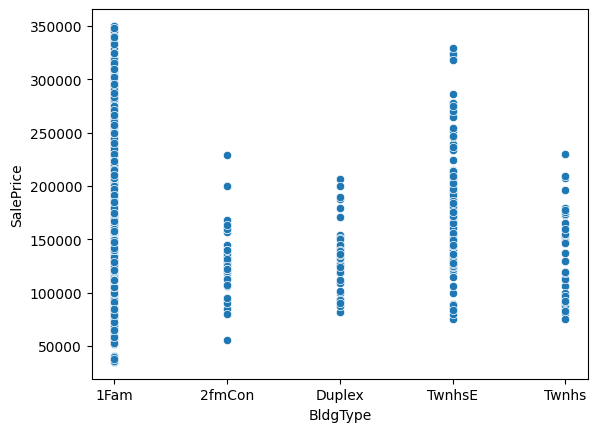

In [30]:
sns.scatterplot(data=train, x='BldgType', y='SalePrice')  

<Axes: xlabel='RoofStyle', ylabel='SalePrice'>

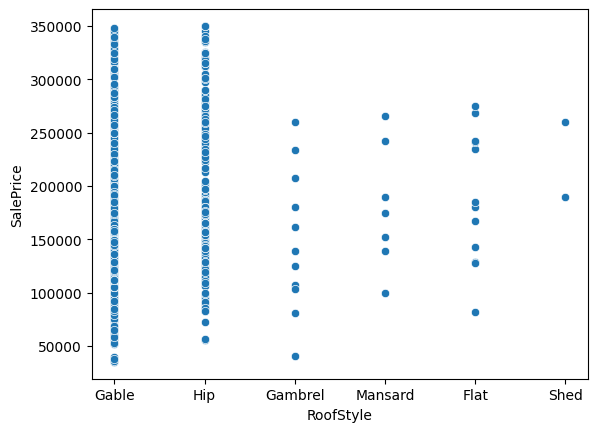

In [35]:
sns.scatterplot(data=train, x='RoofStyle', y='SalePrice')  

<Axes: xlabel='RoofMatl', ylabel='SalePrice'>

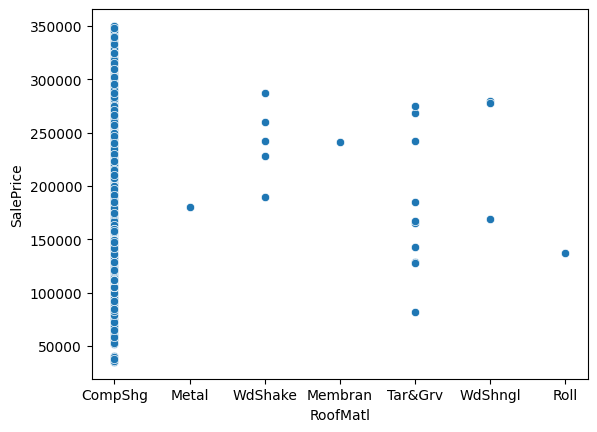

In [36]:
sns.scatterplot(data=train, x='RoofMatl', y='SalePrice')  

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

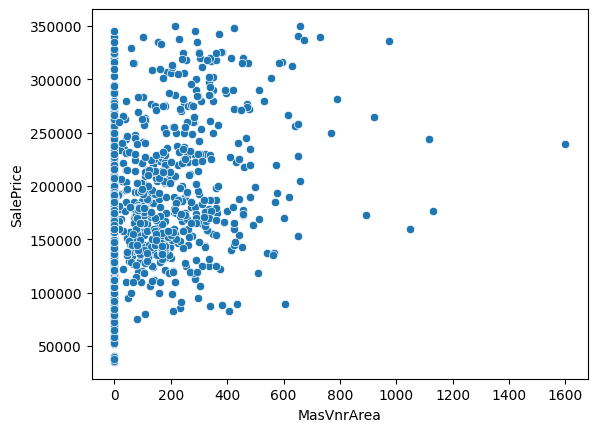

In [40]:
sns.scatterplot(data=train, x='MasVnrArea', y='SalePrice')  

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

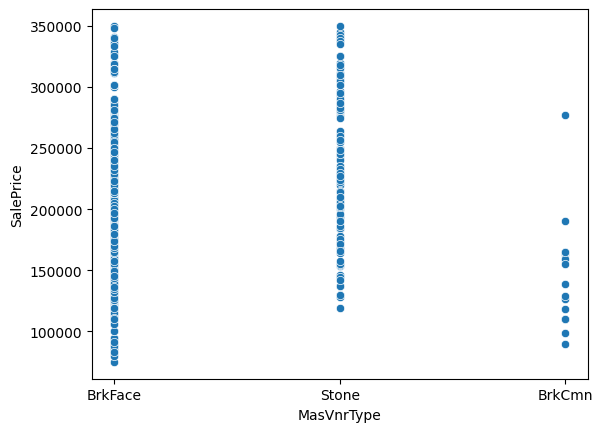

In [43]:
sns.scatterplot(data=train, x='MasVnrType', y='SalePrice') 

<Axes: xlabel='MiscFeature', ylabel='SalePrice'>

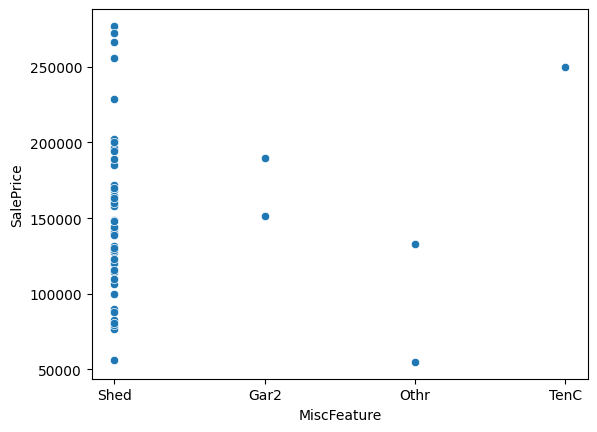

In [88]:
sns.scatterplot(data=train, x='MiscFeature', y='SalePrice') 

In [79]:
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1','BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'LowQualFinSF', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'GarageYrBlt', 'GarageFinish',
    'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition' ]
 

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'CentralAir',
 'LowQualFinSF',
 'FireplaceQu',
 'PoolQC',
 'MiscFeature',
 'GarageYrBlt',
 'GarageFinish',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscVal',
 'MoSold']

In [54]:
train_heat

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,SalePrice
0,Gd,TA,No,706,GLQ,Unf,0,150,208500
1,Gd,TA,Gd,978,ALQ,Unf,0,284,181500
2,Gd,TA,Mn,486,GLQ,Unf,0,434,223500
3,TA,Gd,No,216,ALQ,Unf,0,540,140000
4,Gd,TA,Av,655,GLQ,Unf,0,490,250000
...,...,...,...,...,...,...,...,...,...
1452,Gd,TA,No,0,Unf,Unf,0,953,175000
1453,Gd,TA,No,790,ALQ,Rec,163,589,210000
1454,TA,Gd,No,275,GLQ,Unf,0,877,266500
1455,TA,TA,Mn,49,GLQ,Rec,1029,0,142125


In [55]:
sns.heatmap(train_heat)

ValueError: could not convert string to float: 'Gd'